<a href="https://colab.research.google.com/github/dapsavoie/agricultural_satellite_classifier/blob/master/Clean_Quick_Classifier_with_Unit_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [1]:
import pandas as pd 
import keras 
from keras.models import load_model 
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import os 
import numpy as np 
import matplotlib.pyplot as plt 

Using TensorFlow backend.


In [0]:
def quick_classifier(img='', model='', target_size=(256, 256, 3)):
  model = load_model(model)
  img = image.load_img(img, target_size=target_size)
  img = image.img_to_array(img)
  img = img/255
  columns = columns = ['cloud_shadow', 'double_planter', 'planter_skip', 'standing_water', 'waterway', 'weed_cluster']
  classes = np.array(columns[0:])
  proba = model.predict(img.reshape(1, 256, 256, 3))
  top_3 = np.argsort(proba[0])[:-4:-1]

  for i in range(3):
      results = print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
  img = plt.imshow(img)

  return print(results, img) 

double_planter (0.836)
standing_water (0.0436)
weed_cluster (0.0354)
None AxesImage(54,36;334.8x217.44)


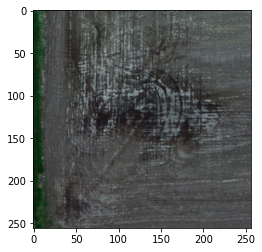

In [76]:
img1 = '/content/drive/My Drive/agri_vision/Agriculture-Vision/test/test_rgb/1FPBNGD9F_751-8269-1263-8781.jpg'
model1 = '/content/drive/My Drive/agri_vision/Agriculture-Vision/adam_78.h5'

quick_classifier(img=img1, model=model1, target_size=(256, 256, 3))

In [79]:
# Unit test 

import unittest 

class test_qc(unittest.TestCase):
  """Check target size in quick_classifier is 256, 256, 3"""
  def test_check_img_size(self):
      check_target_size = quick_classifier(target_size=(256, 256, 3))
      self.assertIn(check_target_size, target_size=(256, 256, 3))

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False) #added because im coding in a notebook

E
ERROR: test_check_img_size (__main__.test_qc)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-79-6cf2f0c2cd87>", line 8, in test_check_img_size
    check_target_size = quick_classifier(target_size=(256, 256, 3))
  File "<ipython-input-73-92d36fe521c9>", line 2, in quick_classifier
    model = load_model(model)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py", line 492, in load_wrapper
    return load_function(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py", line 583, in load_model
    with H5Dict(filepath, mode='r') as h5dict:
  File "/usr/local/lib/python3.6/dist-packages/keras/utils/io_utils.py", line 191, in __init__
    self.data = h5py.File(path, mode=mode)
  File "/usr/local/lib/python3.6/dist-packages/h5py/_hl/files.py", line 408, in __init__
    swmr=swmr)
  File "/usr/local/lib/python3.6/dist-packages/h5py/_hl/files.py", line 173, in 